# Lab 8:  FIR Filters

#### Goal: 
In today's lab we will use Python to illustrate the use of FIR filters that we saw in the lectures. 
Specifically, you will:
1. implement an FIR filter
2. build your own function that performs convolution
3. use a RA filter (special case of FIR) to denoise an audio signal.

## 1. Finite impulse response (FIR) filters

Recall that a finite-impulse response filter is a discrete-time system with the following input-output relation:
$$
y[n] = \sum_{\ell=0}^{M} h_\ell x[n-\ell],~~~\forall n\in\mathbb{Z},
$$
where, $M$ is the *order* of the filter and $h_0,\ldots,h_M$ are the filter coefficients.

In particular, this is a **causal** FIR running average filter (Why?). 

Consider an FIR filter with input-ouput relation as follows:
$$
y[n] = \sum_{\ell=0}^{10} \big(6-|\ell-5|\big)\, x[n-\ell],~~~\forall n\in\mathbb{Z},
$$

<font color='red'>**Exercise 1.1**</font> What are the filter coefficients? Create an 1D vector with the values of the filter coefficients. Use a for loop to do so. Do not forget to import the numpy package first!

In [1]:
import numpy as np                # Import necessary packages

M = 10
filter_coefficients = np.zeros(M+1)           # initialize an array of zeros of **appropriate length**
for ell in range(len(filter_coefficients)) :
    filter_coefficients[ell] = 6-abs(ell-5)     # set the value of the \ell^{th} filter coefficients

Print the values of the array

In [2]:
print(filter_coefficients)

[1. 2. 3. 4. 5. 6. 5. 4. 3. 2. 1.]


<font color='red'>**Exercise 1.2**</font> Generate a stem-plot of the **impulse responds of the filter.** 

C:\Python37-32\lib\site-packages\ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


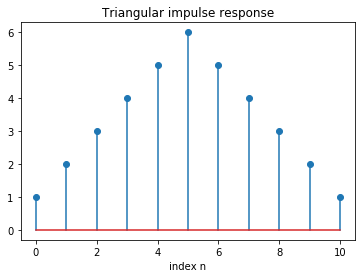

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

h = filter_coefficients            # impulse response array

plt.stem( range(0,M+1) , h )
plt.title('Triangular impulse response')
plt.xlabel('index n')
plt.show()

To better understand the functionality of FIR filter, let us compute the output $y[n]$ of the system for a particular input signal $x[n]$. 

Consider the same input signal $x[n]$ that we saw in the last lecture.

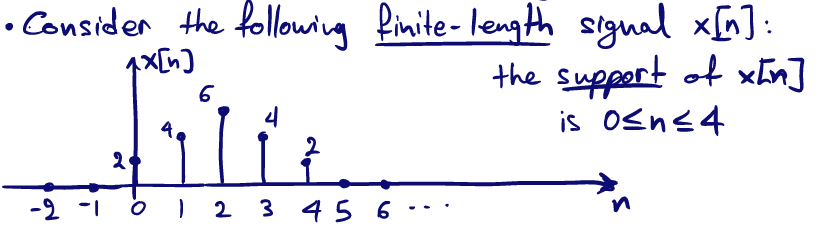

<font color='red'>**Exercise 1.3**</font> Compute the output of an FIR filter when $x[n]$ above is the input. We will walk you through this. So, follow the steps as indicated below.

<font color='red'>**Exercise 1.3.1**</font> Initialize the following variables.

In [4]:
# length of input signal x[n]
N = 5

# length of the output signal y[n]. First answer what is the support set of the output signal?
# The length of the output is the size of the support set plus one
L = N+M

<font color='red'>**Exercise 1.3.2**</font> Initialize two 1-D arrays of length $N$ and $L$ each to store the values of the input and output signals, respectively. For the input signal, you already know the values that it takes. For the output signals just set all entries to zero for now. We will compute the correct entries subsequently.

In [5]:
x = np.zeros(N)
y = np.zeros(L)

for i in range(len(x)) :
    x[i] = 2*(3-abs(i-2))

Let us now make a [stem plot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.stem.html) of the input signal $x[n]$.

C:\Python37-32\lib\site-packages\ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


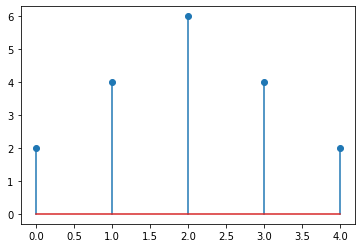

In [6]:
plt.stem( range(0,N) , x )
plt.show()

<font color='red'>**Exercise 1.3.3**</font> Write Python code that computes the output signal $y[n]$. Also, make a stem plot of the output signal.

In [7]:
y = np.zeros(L)
for n in range(L):                         # n=0,1,....,L-1
    for ell in range(M):                   # ell=0,1,2,...,M-1 
        if (n-ell>=0 and n-ell<=N-1): 
            y[n] = y[n] + x[n-ell] * filter_coefficients[ell];    

The code above has two for-loops. 

The outer loop runs over all time indices $n$ for which we want to compute the value of $y[n]$. 

The inner loop runs over an the index $\ell$ of the summation that defines the input-output relation of the FIR filter:
$$
y[n] = \sum_{\ell=0}^{10} \big(6-|\ell-5|\big)\, x[n-\ell],~~~\forall n\in\mathbb{Z},
$$

[ 2.  8. 20. 36. 54. 72. 86. 92. 86. 72. 52. 32. 14.  4.  0.]


C:\Python37-32\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
C:\Python37-32\lib\site-packages\ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


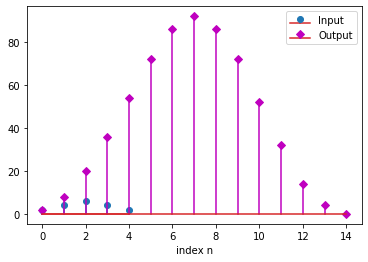

In [8]:
print(y)
plt.stem( range(0,N) , x , label='Input')
plt.stem( range(0,L) , y , 'm' , markerfmt='mD' , label='Output')
plt.xlabel('index n')
plt.legend()
plt.show()

### 1.1 FIR filter function

<font color='red'>**Exercise 1.4**</font> Write a Python function that takes as arguments an input signal x of length $N$, an impulse response of length $M+1$ and computes the output $y$ (of length L=N+M) of a causal FIR filter of order $M$ with the specified impulse response.

In [9]:
def causal_FIR_Filter(x_in,h_FIR):
    # x_in: inptut signal 
    # h_FIR: impulse response of the FIR filter
    
    N = len(x_in)         # length of input signal. 
    M = len(h_FIR)-1      # order of the impulse response. Remember, by convention the order is equal to the length of the impulse response minus 1 
    
    L = N+M              # length of output
    y = np.zeros(L)    # initialize output
    
    for n in range(L):                  # n=0,1,....,L-1
        for ell in range(M+1):                # ell=0,1,...,M
            if (n-ell>=0 and n-ell<=N-1): 
                y[n] = y[n] + x_in[n-ell] * h_FIR[ell];
    return y

<font color='red'>**Exercise 1.5**</font> Test your function by calling it on the input signal and on the triangle impulse response you saw in the previous part. Plot the output and make sure that it looks the same as what you got in Exercise 1.3.3.

C:\Python37-32\lib\site-packages\ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


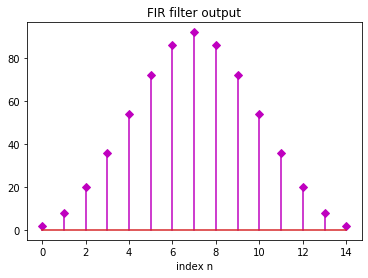

In [10]:
x = np.array([2,4,6,4,2]) # input signal from Exercise 1.3.2
h = filter_coefficients   # impulse response of filter in Exercise 1.2

output = causal_FIR_Filter(x,h)
plt.stem( range(len(output)) , output , 'm' , markerfmt='mD')
plt.xlabel('index n')
plt.title('FIR filter output')
plt.show()

### 1.2 Convolution

Recall that we called the sum $\sum_{\ell=0}^{M} h_\ell x[n-\ell]$ a **convolution sum**. 
As we mentioned in class, convolution is a fundamental operation in signal-processing (and not only signal processing!). Not surprisingly, the Numpy package has a function called [`np.convolve`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.convolve.html) that performs convolution between two 1D signals.

<font color='red'>**Exercise 1.6**</font> Call the convolution function of the numpy package on the input signal x and impulse response h of Exercise 1.1. Plot the output of the function and verify that it produces the same result as your function `causal_FIR_Filter`.

C:\Python37-32\lib\site-packages\ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


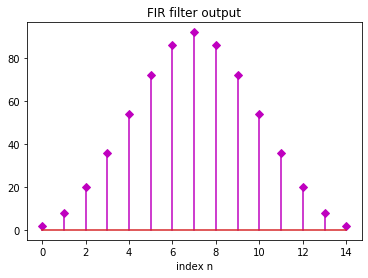

In [11]:
x = np.array([2,4,6,4,2]) # input signal from Exercise 1.3.2
h = filter_coefficients # impulse response of filter in Exercise 1.2

output1 = np.convolve(x,h)
plt.stem( range(len(output1)) , output1 , 'm' , markerfmt='mD')
plt.xlabel('index n')
plt.title('FIR filter output')
plt.show()

In [12]:
# Make sure these are the same!!!
print(causal_FIR_Filter(x,h))
print(np.convolve(x,h))
assert np.array_equal(causal_FIR_Filter(x,h), np.convolve(x,h)), "The arrays are not equal!"

[ 2.  8. 20. 36. 54. 72. 86. 92. 86. 72. 54. 36. 20.  8.  2.]
[ 2.  8. 20. 36. 54. 72. 86. 92. 86. 72. 54. 36. 20.  8.  2.]


## 2. Denoising of an audio signal
In this part of the lab we will revisit the running-average filter. In particular, we will show the effectiveness of the filter in **denoising** an audio signal.

In [13]:
import IPython
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.io import wavfile

We will work with the following tune. Let us first hear it using Ipython Display.

In [14]:
IPython.display.Audio("turkey.wav")

We will read the audio file using scipy functions. Here `fs` denotes the sampling frequency of the audio signal and `data` is a numpy array containing the value of the sampled signal representing the tune above. 
While reading, scipy convertes the values in the raw audio file to integers. 

In [15]:
fs, data = wavfile.read('turkey.wav') 

print(fs)
print(type(data))

44100
<class 'numpy.ndarray'>


<font color='red'>**Exercise 2.1**</font> Plot the original discrete-time audio signal. The x-axis should be the index $n$.

350208


Text(0.5, 1.0, 'Original audio signal')

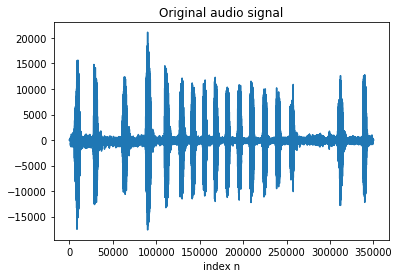

In [16]:
N = len(data)
print(N)
plt.plot(range(N), data)
plt.xlabel('index n')
plt.title('Original audio signal')

Next, we will generate random noise and create a noisy version of the audio signal.

In [17]:
noise = np.random.normal(0,1000,len(data))
## Noisy audio signal
noisy_data = data + noise

<font color='red'>**Exercise 2.2**</font> Plot the noisy audio signal and use the code provided to you to save the noisy audio.

Text(0.5, 1.0, 'Noisy audio signal')

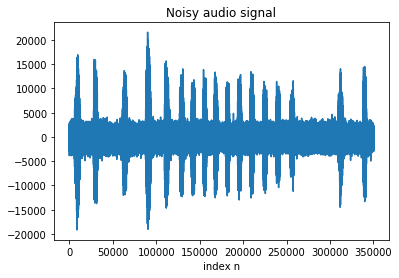

In [18]:
plt.plot(range(len(noisy_data)), noisy_data)
plt.xlabel('index n')
plt.title('Noisy audio signal')

In [19]:
#Save the noisy audio file
res = noisy_data.astype('int16')            
wavfile.write('noisy.wav', fs, res)

<font color='red'>**Exercise 2.3**</font> Play the noisy audio signal. Notice the effect of the additive noise! The turkey's song is distorted!

In [20]:
IPython.display.Audio('noisy.wav')

<font color='red'>**Exercise 2.4**</font> In the previous lab you defined a `causal_RA_filter`. Do the same below, but this time, use the function `causal_FIR_filter` that you defined above. Recall that an running average filter is a special case of an FIR filter! 

In [21]:
def causal_RA_Filter(x_in,M):
    # x: inptut signal 
    # M: length of the running average filter
    
    h_RA = np.ones(M)/M                   # What is the impulse response of a RA filter of length M?
    y= causal_FIR_Filter(x_in,h_RA)
 
    return y

Let us call the function to denoise the input signal. Use a running average filter of length 5.

In [22]:
clean_5 = causal_RA_Filter(noisy_data,5)

##Storing the clean signal. You need to convert the clean signal to integers.
res5 = clean_5.astype('int16')
wavfile.write('clean_5.wav', fs, res5)

<font color='red'>**Exercise 1.4**</font> Plot and play the "clean" signal.

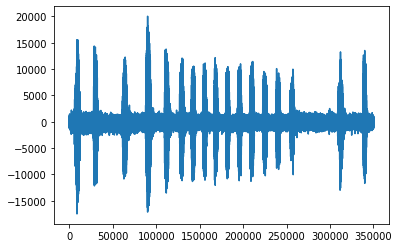

In [23]:
plt.plot(clean_5)
IPython.display.Audio("clean_5.wav")

<font color='red'>**Exercise 1.5**</font> Repeat this process for two RA filter with order 10,15 and save them as 'clean10.wav' and 'clean15.wav'. For each one, plot the clean signal.

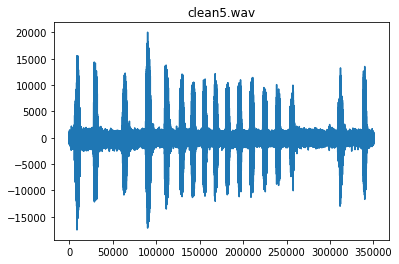

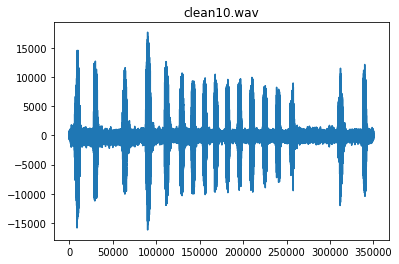

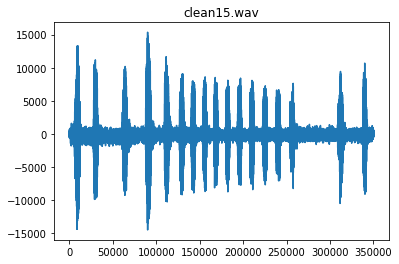

In [24]:
def FilterSound(N):
    cleaned = causal_RA_Filter(noisy_data,N)
    ##Storing the clean signal. You need to convert the clean signal to integers.
    res = cleaned.astype('int16')
    Name = 'clean' + str(N) + '.wav'
    wavfile.write(Name, fs, res)
    plt.plot(cleaned)
    plt.title(Name)
    plt.show()
for i in range(3): FilterSound(5*(i+1))

<font color='red'>**Exercise 1.5**</font> Play the three clean signals.

In [25]:
IPython.display.display(IPython.display.Audio("clean_5.wav"))
IPython.display.display(IPython.display.Audio("clean10.wav"))
IPython.display.display(IPython.display.Audio("clean15.wav"))